# Trabalho 01

In [53]:
from math import sin, sqrt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import mplcursors
import random

In [40]:
class GeneticAlgorithm:
    def __init__(self, size, n_generations, n_childrens, mutation, fitness, interval, for_max=True):
        self.size = size
        self.n_generations = n_generations
        self.n_childrens = n_childrens
        self.mutation = mutation
        self.fitness = fitness
        self.interval = interval
        self.for_max = for_max

        self.population = self.init_population()
        self.childrens = []
        self.fitness_avgs = []
        self.fitness_max = []
        self.fitness_min = []

    def evaluate(self, x, y):
        return self.fitness(x, y)

    def init_population(self):
        population = []
        for i in range(self.size):
            x = random.randint(self.interval[0], self.interval[1])
            y = random.randint(self.interval[0], self.interval[1])
            fitness = self.evaluate(x, y)
            individual = [x, y, fitness]
            population.append(individual)

        return population

    def select_father(self):
        max = len(self.population) - 1
        pos_candidate1 = random.randint(0, max)
        pos_candidate2 = random.randint(0, max)

        pos_father = 0
        
        if(self.population[pos_candidate1][2] > self.population[pos_candidate2][2]):
            pos_father = pos_candidate1
        else:
            pos_father = pos_candidate2              

        return pos_father

    def intersection(self, pos_father1, pos_father2):
        x_c1 = self.population[pos_father1][0]
        x_c2 = self.population[pos_father2][0]
        y_c1 = self.population[pos_father2][1]
        y_c2 = self.population[pos_father1][1]

        fitness_c1 = self.evaluate(x_c1, y_c1)
        fitness_c2 = self.evaluate(x_c2, y_c2)

        return [x_c1, y_c1, fitness_c1], [x_c2, y_c2, fitness_c2]
    
    def mutate(self, children):
        x = random.randint(0, 100)
        y = random.randint(0, 100)

        if(x <= self.mutation):
            children[0] = random.randint(self.interval[0], self.interval[1])
        
        if(y <= self.mutation):
            children[1] = random.randint(self.interval[0], self.interval[1])

        return children
    
    def discard(self):
        ind = 1
        for_max = not self.for_max

        while ind <= self.n_childrens:
            index = self.tournament_selection(2, for_max)
            self.population.pop(index)
            ind +=1

    def min_discard(self, individuals):
        self.population = sorted(individuals, key=lambda x:x[2], reverse=True)
        self.discard()
            
    def max_discard(self, individuals):
        self.population = sorted(individuals, key=lambda x:x[2]) 
        self.discard()

    def tournament_selection(self, n, for_max=True):
        # Seleciona n índices aleatoriamente
        candidate_index = random.sample(range(len(self.population)), n)
        #print(candidates)

        candidates = [(i, self.population[i]) for i in candidate_index]
        
        if(for_max):
            best_index, _ = max(candidates, key=lambda x: x[1][2])
        else:
            best_index, _ = min(candidates, key=lambda x: x[1][2])

        return best_index
        
    def roulette_selection(self):
        sum_fitness = sum(individual[2] for individual in self.population)

        select = random.uniform(0, sum_fitness)

        current = 0

        for individual in self.population:
            current += individual[2]

            if current >= select:
                return individual

    def generate(self):
        n = 1

        while n <= self.n_childrens/2:
            pos_father1 = self.tournament_selection(2, for_max=False)
            pos_father2 = self.tournament_selection(2, for_max=False)

            children1, children2 = self.intersection(pos_father1, pos_father2)

            children1 = self.mutate(children1)
            children2 = self.mutate(children2)

            self.childrens.append(children1)
            self.childrens.append(children2)

            n += 1

    def check_individual_best(self):
        pos_best = len(self.population) - 1
        avg = self.avg_fitness()
        max_fit = max(self.population, key=lambda x:x[2])[2]
        min_fit = min(self.population, key=lambda x:x[2])[2]
        
        print(f'TAMANHO POPULAÇÃO {len(self.population)}')
        print(self.population)
        print('O melhor individuo: ')
        print('x = ', self.population[pos_best][0])
        print('y = ', self.population[pos_best][1])
        print('fitness = ', self.population[pos_best][2])
        print('maior fitness = ', max_fit)
        print('menor fitness = ', min_fit)
        print(f'média fitness = {avg}\n')

        self.fitness_avgs.append(avg)
        self.fitness_max.append(max_fit)
        self.fitness_min.append(min_fit)

    def avg_fitness(self):
        sum_fitness = sum(individual[2] for individual in self.population)

        return sum_fitness / len(self.population)

    def init(self):
        count_generations = 1

        while count_generations <= self.n_generations:
            print(f'Geração {count_generations}º:')
            self.childrens = []
            self.generate()
            self.population = self.population + self.childrens
            
            if(self.for_max):
                self.max_discard(self.population)
            else:
                self.min_discard(self.population)

            self.check_individual_best()
            count_generations += 1
    

In [51]:
def plot_fitness(data_avg, data_max, data_min):
    plt.xticks(np.arange(len(data_avg)))

    plt.stackplot(range(len(data_avg)), data_min, data_avg, data_max, 
                  labels=['Mínimo','Média','Máximo'], alpha=0.5)

    plt.title('Fitness por geração')
    plt.xlabel('Geração')
    plt.ylabel('Fitness')
    plt.legend(loc='upper left')

    plt.ylim(min(data_min), max(data_max))

    plt.show()

## 1ª Versão:

<p>a) Proponha e justifique uma codificação, tamanho da população e fitness. Plote a superfície em 3D da função custo e mostre os pontos de ótimo encontrados na melhor simulação.</p>

In [6]:
fitness_v1 = lambda x1, x2: 837.9658 - calc_xi(x1) - calc_xi(x2) 

def calc_xi(x):
    return (x * sin(sqrt(modulo(x))))

def modulo(x):
    if(x<0):
        return -1 * x
    else:
        return x

Geração 1º:
TAMANHO POPULAÇÃO 100
[[-400, -449, 1525.714548141867], [-404, 285, 1484.2348229935153], [-207, -421, 1457.4966458178908], [-219, -406, 1401.9671779874434], [-405, -218, 1401.8339192375624], [-386, -189, 1288.9933918721952], [153, -426, 1283.7068931695771], [-424, 484, 1260.07246633156], [-171, 302, 1222.0024542344108], [-424, 50, 1220.3453680431023], [-181, -203, 1180.0611436579263], [31, 318, 1128.769870501797], [15, 318, 1118.4544584409794], [89, 279, 1072.8487146325997], [348, -172, 995.0106213627403], [31, 340, 993.972570878705], [15, 119, 966.5357319634256], [-28, -226, 955.6992659483327], [220, 286, 935.957980996121], [-239, 96, 931.7101125855672], [-348, 340, 906.2768533171943], [-54, 34, 900.0689960973398], [118, 167, 896.6480463806371], [6, -57, 888.5207078664457], [252, -483, 886.4487850308046], [-52, -356, 886.1374871173696], [118, -141, 864.954759182014], [26, -14, 854.1408632381322], [-55, -351, 847.6556170914865], [-26, 157, 819.5995565329396], [-259, 149, 79

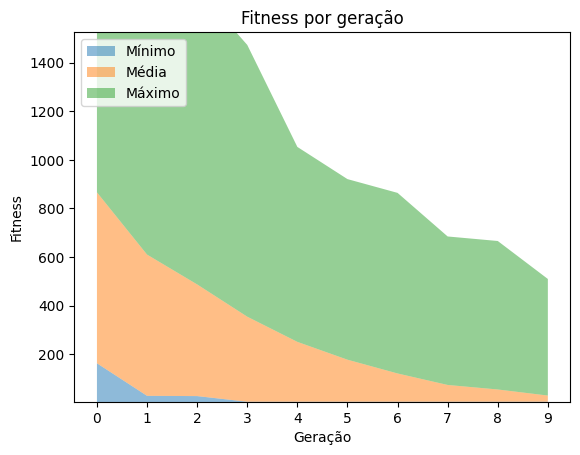

In [52]:
algorithm = GeneticAlgorithm(size=100, n_childrens=70, n_generations=10, mutation=1, interval=[-500, 500], fitness=fitness_v1, for_max=False)

algorithm.init()

data_avg = algorithm.fitness_avgs
data_max = algorithm.fitness_max
data_min = algorithm.fitness_min

plot_fitness(data_avg, data_max, data_min)